# **Early Sepsis Prediction 8 features**

### This notebook is for building a model to predict early sepsis

## **Data Description**

Row|Measurement|Description
---|:---|:---
1| **HR**| Heart rate (beats/min)
2| **O2Sat**| Pulse oximetry (%)
3| **Temp** |Temperature (°C)
4|**SBP**| Systolic BP (mm Hg)
5| **MAP**| Mean arterial pressure (mm Hg)
6| **DBP**| Diastolic BP (mm Hg)
7| **Resp**| Respiration rate (breaths/min)
8| **Etco2**| End tidal carbon dioxide (mm Hg)
9| **BaseExcess**| Excess bicarbonate (mmol/L)
10| **Hco3**| Bicarbonate (mmol/L)
11 |**Fio2**| Fraction of inspired oxygen (%)
12 |**pH**| pH
13 |**Paco2**|Partial pressure of carbon dioxide fromarterial blood (mm Hg)
14 |**Sao2**| Oxygen saturation from arterial blood (%)
15 |**AST**| Aspartate transaminase (IU/L)
16 |**BUN**| Blood urea nitrogen (mg/dL)
17 |**Alkalinephos**| Alkaline phosphatase (IU/L)
18 |**Calcium**| Calcium (mg/dL)
19 |**Chloride**| Chloride (mmol/L)
20 |**Creatinine**| Creatinine (mg/dL)
21 |**Bilirubin**| direct Direct bilirubin (mg/dL)
22 |**Glucose**| Serum glucose (mg/dL)
23 |**Lactate**| Lactic acid (mg/dL)
24 |**Magnesium**| Magnesium (mmol/dL)
25 |**Phosphate**| Phosphate (mg/dL)
26 |**Potassium**| Potassium (mmol/L)
27 |**Bilirubin total**| Total bilirubin (mg/dL)
28 |**TroponinI**| Troponin I (ng/mL)
29 |**Hct**| Hematocrit (%)
30 |**Hgb**| Hemoglobin (g/dL)
31 |**PTT**| Partial thromboplastin time (s)
32 |**WBC**| Leukocyte count (count/L)
33 |**Fibrinogen**| Fibrinogen concentration (mg/dL)
34 |**Platelets**| Platelet count (count/mL)
35 |**Age**| Age (yr)
36 |**Gender**| Female (0) or male (1)
37 |**Unit 1**| Administrative identifier for ICU unit (medical ICU); false (0) or true (1)
38 |**Unit 2**| Administrative identifier for ICU unit (surgical ICU); false (0) or true (1)
39 |**HospAdmTime**| Time between hospital and ICU admission (hours since ICU admission)
40 |**ICULOS**| ICU length of stay (hours since ICU admission)
41 |**SepsisLabel**| For septic patients, SepsisLabel is 1 if $t \geq t_{sepsis}-6$ and $0$ if $t < t_{sepsis}-6$.For nonseptic patients, SepsisLabel is 0.

### **Import Libraries**

In [ ]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
)
from sklearn.compose import ColumnTransformer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import f1_score

# Serialization
import joblib

# Visualization Utilities
from IPython import display
import matplotlib.image as mpimg
from skimage.util import montage
import glob

## **1 - Data importation and Visualization**


### **Import Data**

In [ ]:
csv_path = "../Data/dataSepsis.csv"
data = pd.read_csv(csv_path, sep=";")


### **Visualize Data**

In [4]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,NaN,21.0,45.0,...,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,NaN,22.0,...,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,NaN,31.0,...,8.3,NaN,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,...,12.0,NaN,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,NaN,-12.0,13.0,...,9.3,NaN,26.0,64.24,1,1.0,0.0,-0.05,2,0


In [ ]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [ ]:
data.head(5).T

,0,1,2,3,4
HR,103.00,58.00,91.00,92.00,155.50
O2Sat,90.00,95.00,94.00,100.00,94.50
Temp,NaN,36.11,38.50,NaN,NaN
SBP,NaN,143.00,133.00,NaN,147.50
MAP,NaN,77.00,74.00,NaN,102.00
DBP,NaN,47.00,48.00,NaN,NaN
Resp,30.00,11.00,34.00,NaN,33.00
EtCO2,NaN,NaN,NaN,NaN,NaN
BaseExcess,21.00,NaN,NaN,NaN,-12.00
HCO3,45.00,22.00,31.00,29.00,13.00


In [ ]:
# Check data size
data.shape

(36302, 41)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

In [ ]:
data.count(axis=0).sort_values(ascending=True)

,0
Bilirubin_direct,1132
EtCO2,1613
Fibrinogen,2141
TroponinI,3746
Lactate,4134
SaO2,4335
FiO2,6427
BaseExcess,7184
PaCO2,8430
pH,9221


In [ ]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


In [ ]:
data["isSepsis"].value_counts(normalize=True).to_frame()

,proportion
isSepsis,
0,0.927084
1,0.072916


In [ ]:
data["isSepsis"].value_counts()

,count
isSepsis,
0,33655
1,2647


In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(data.drop("isSepsis", axis=1),
                     data["isSepsis"], test_size=0.15,
                     random_state=42, stratify=data["isSepsis"])

print("Training data: ", X_train.shape)
print("Training labels: ", y_train.shape)

print("Testing data: ", X_test.shape)
print("Testing labels: ", y_test.shape)

Training data:  (30856, 40)
Training labels:  (30856,)
Testing data:  (5446, 40)
Testing labels:  (5446,)


In [6]:
vitals = ["HR", # Heart Rate normal adult 60 - 100 beats per minute (bpm)
          'O2Sat', # Oxygen saturation normal adult 97% - 100% (%)
          'Temp', # Temperature normal 97.8°F/36.5°C - 99°F/37.2°C (°C)
          'SBP', # Systolic Blood Pressure normal < 120 mmHg (mm Hg) (indicates how much pressure your blood is exerting against your artery walls when the heart beats.)
          'DBP', # beclomethasone dipropionate normal < 80 mmHg (mm Hg) (indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats.)
          'MAP', # Mean Arterial Pressure (mm Hg)
          'Resp', # Respiration rate  12<normal<20 breaths / minute (bpm)
          "EtCO2" # End-tidal CO2 maximum concentration of CO2 at exhalation normal 35 - 45 mmHg (mm Hg)
          ]

labs = ['BaseExcess', # strong acid to restore pH (mmoI/L)
        'Magnesium', # symptoms such as weakness, irritability, cardiac arrhythmia, nausea, and/or diarrhea (mmoI/L)
        'Glucose', # blood sugar test (indicates diagnose diabetes, pre-diabetes and gestational diabetes) (mg/dL)
        'Alkalinephos', # Alkaline phosphatase (indicates enzyme activity) (IU/L)
        'pH', # 0:14 = acidic = lower pH; alkaline = higher
        'Chloride', # an electrolyte to balance fluid in cells normal 96-103 ml (indicates blood pressure/pH) (mmoI/L)
        'Lactate', # high levels indicate lack of oxygen (hypoxia) or other conditions (indicates sepsis) (mg/dL)
        # Respiratory
        'HCO3', # Bicarbonate, carbon dioxide in blood (indicates metabolism / resp) (mmoI/L)
        'FiO2', # % of concentration of oxygen inhaled (indicates resp) (%)
        'PaCO2', # partial pressure of carbon dioxide measured in blood (indicates resp) (mm Hg)
        'SaO2', # normal 95-100% oxygen saturation bound to hemoglobin (indicates resp) (%)
        # liver
        'AST', # aspartate aminotransferase (indicates liver) (IU/L)
        'Bilirubin_direct', # conjugated water soluble (indicates liver) (mg/dL)
        'Bilirubin_total', # normal 0.1:1.2 mg/dL (indicates liver) (mg/dL)
        # kidneys
        'BUN', # blood urea nitrogen, nitrogen in the blood (indicates kidneys) (mg/dL)
        'Creatinine', # metabolic panel (indicates kidneys) (mg/dL)
        'Calcium', # indicates range of conditions bones, heart, nerves, kidneys, and teeth (mg/dL)
        'Phosphate', # related to calcium (indicates kidney or diabetes)  (mg/dL)
        'Potassium', # electrolyte or metabolism (affected by blood pressure, kidneys, etc.)  (mmoI/L)
        # Heart
        'TroponinI', # cardiac specific Trenonin I and T (indicates injury to heart muscle)
        # Blood
        'Hct', # Hematocrit (indicates portion of blood from Red Blood Cell count) (%)
        'Hgb', # Hemoglobin apart of Complete Blood Count (CBC) (indicates blood cell count) (g/dL)
        'WBC', # White Blood Cell Count (indicates infection, inflammation or disease) (count10^3/µL)
        'PTT', # Partial Thromboplastin Time (indicates bleeding or blood clot) (seconds)
        'Fibrinogen', # coagulation factor I (indicates bleeding or blood clot or cardiovascular disease) (mg/dL)
        'Platelets' # indicates bleeding disorder, a bone marrow disease, or other underlying condition ((count10^3/µL))
        ]

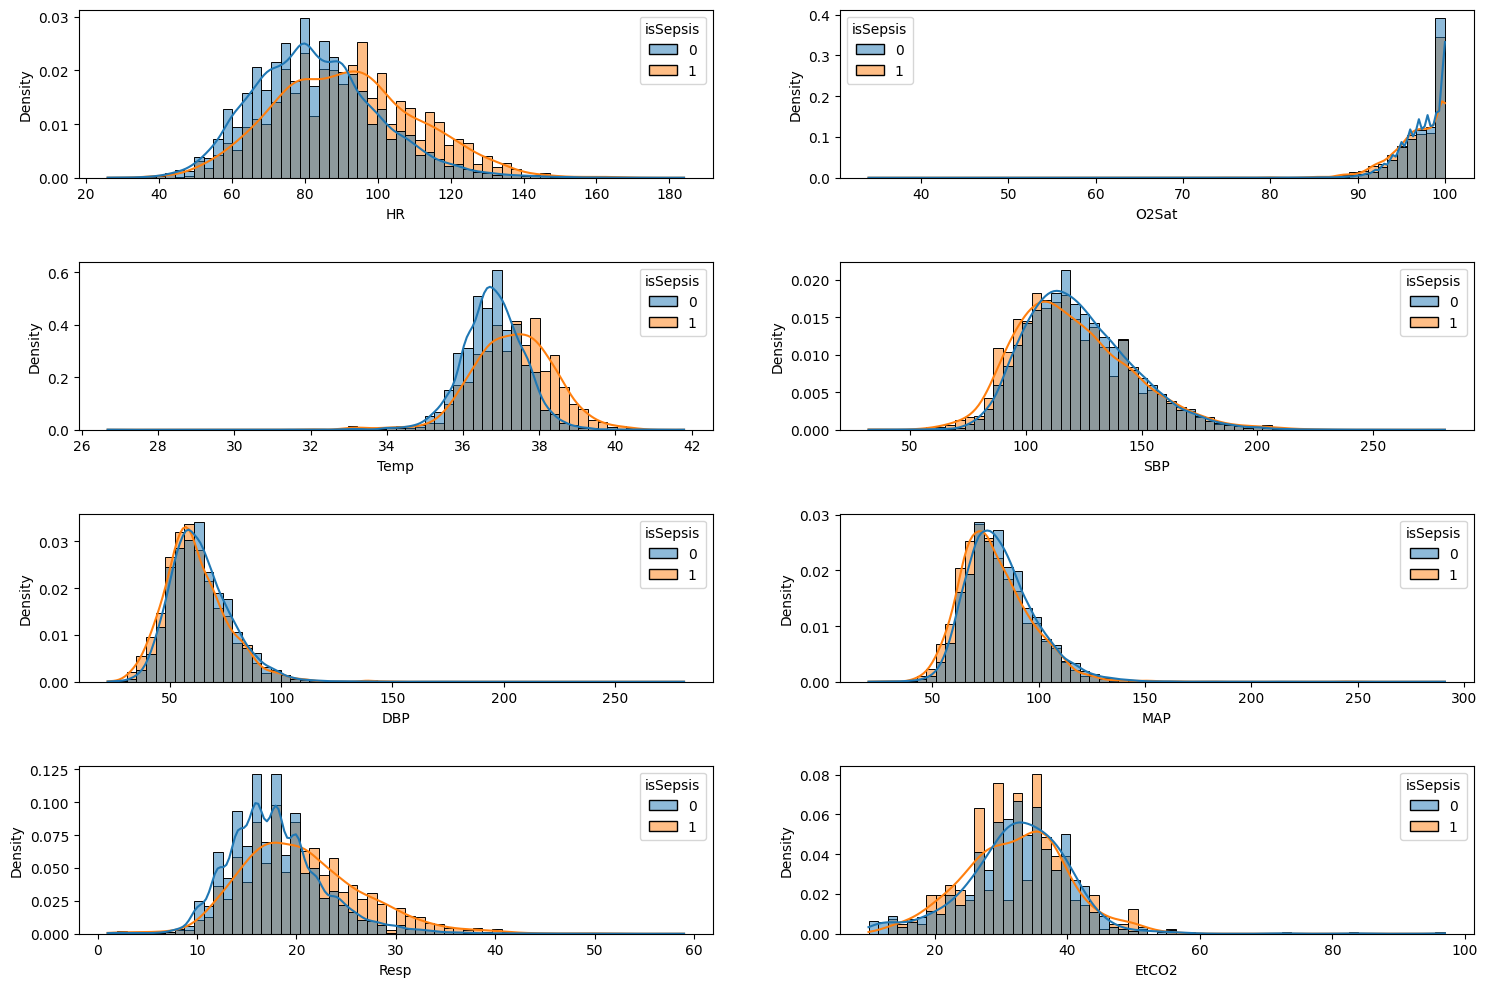

In [ ]:
plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .5)
for i, column in enumerate(vitals, 1):
    plt.subplot(4,2,i)
    # stat = Aggregate statistic to compute in each bin density normalizes counts so that the area of the histogram is 1
    # common_norm = False = normalize each histogram independently
    # kde = If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

<Axes: >

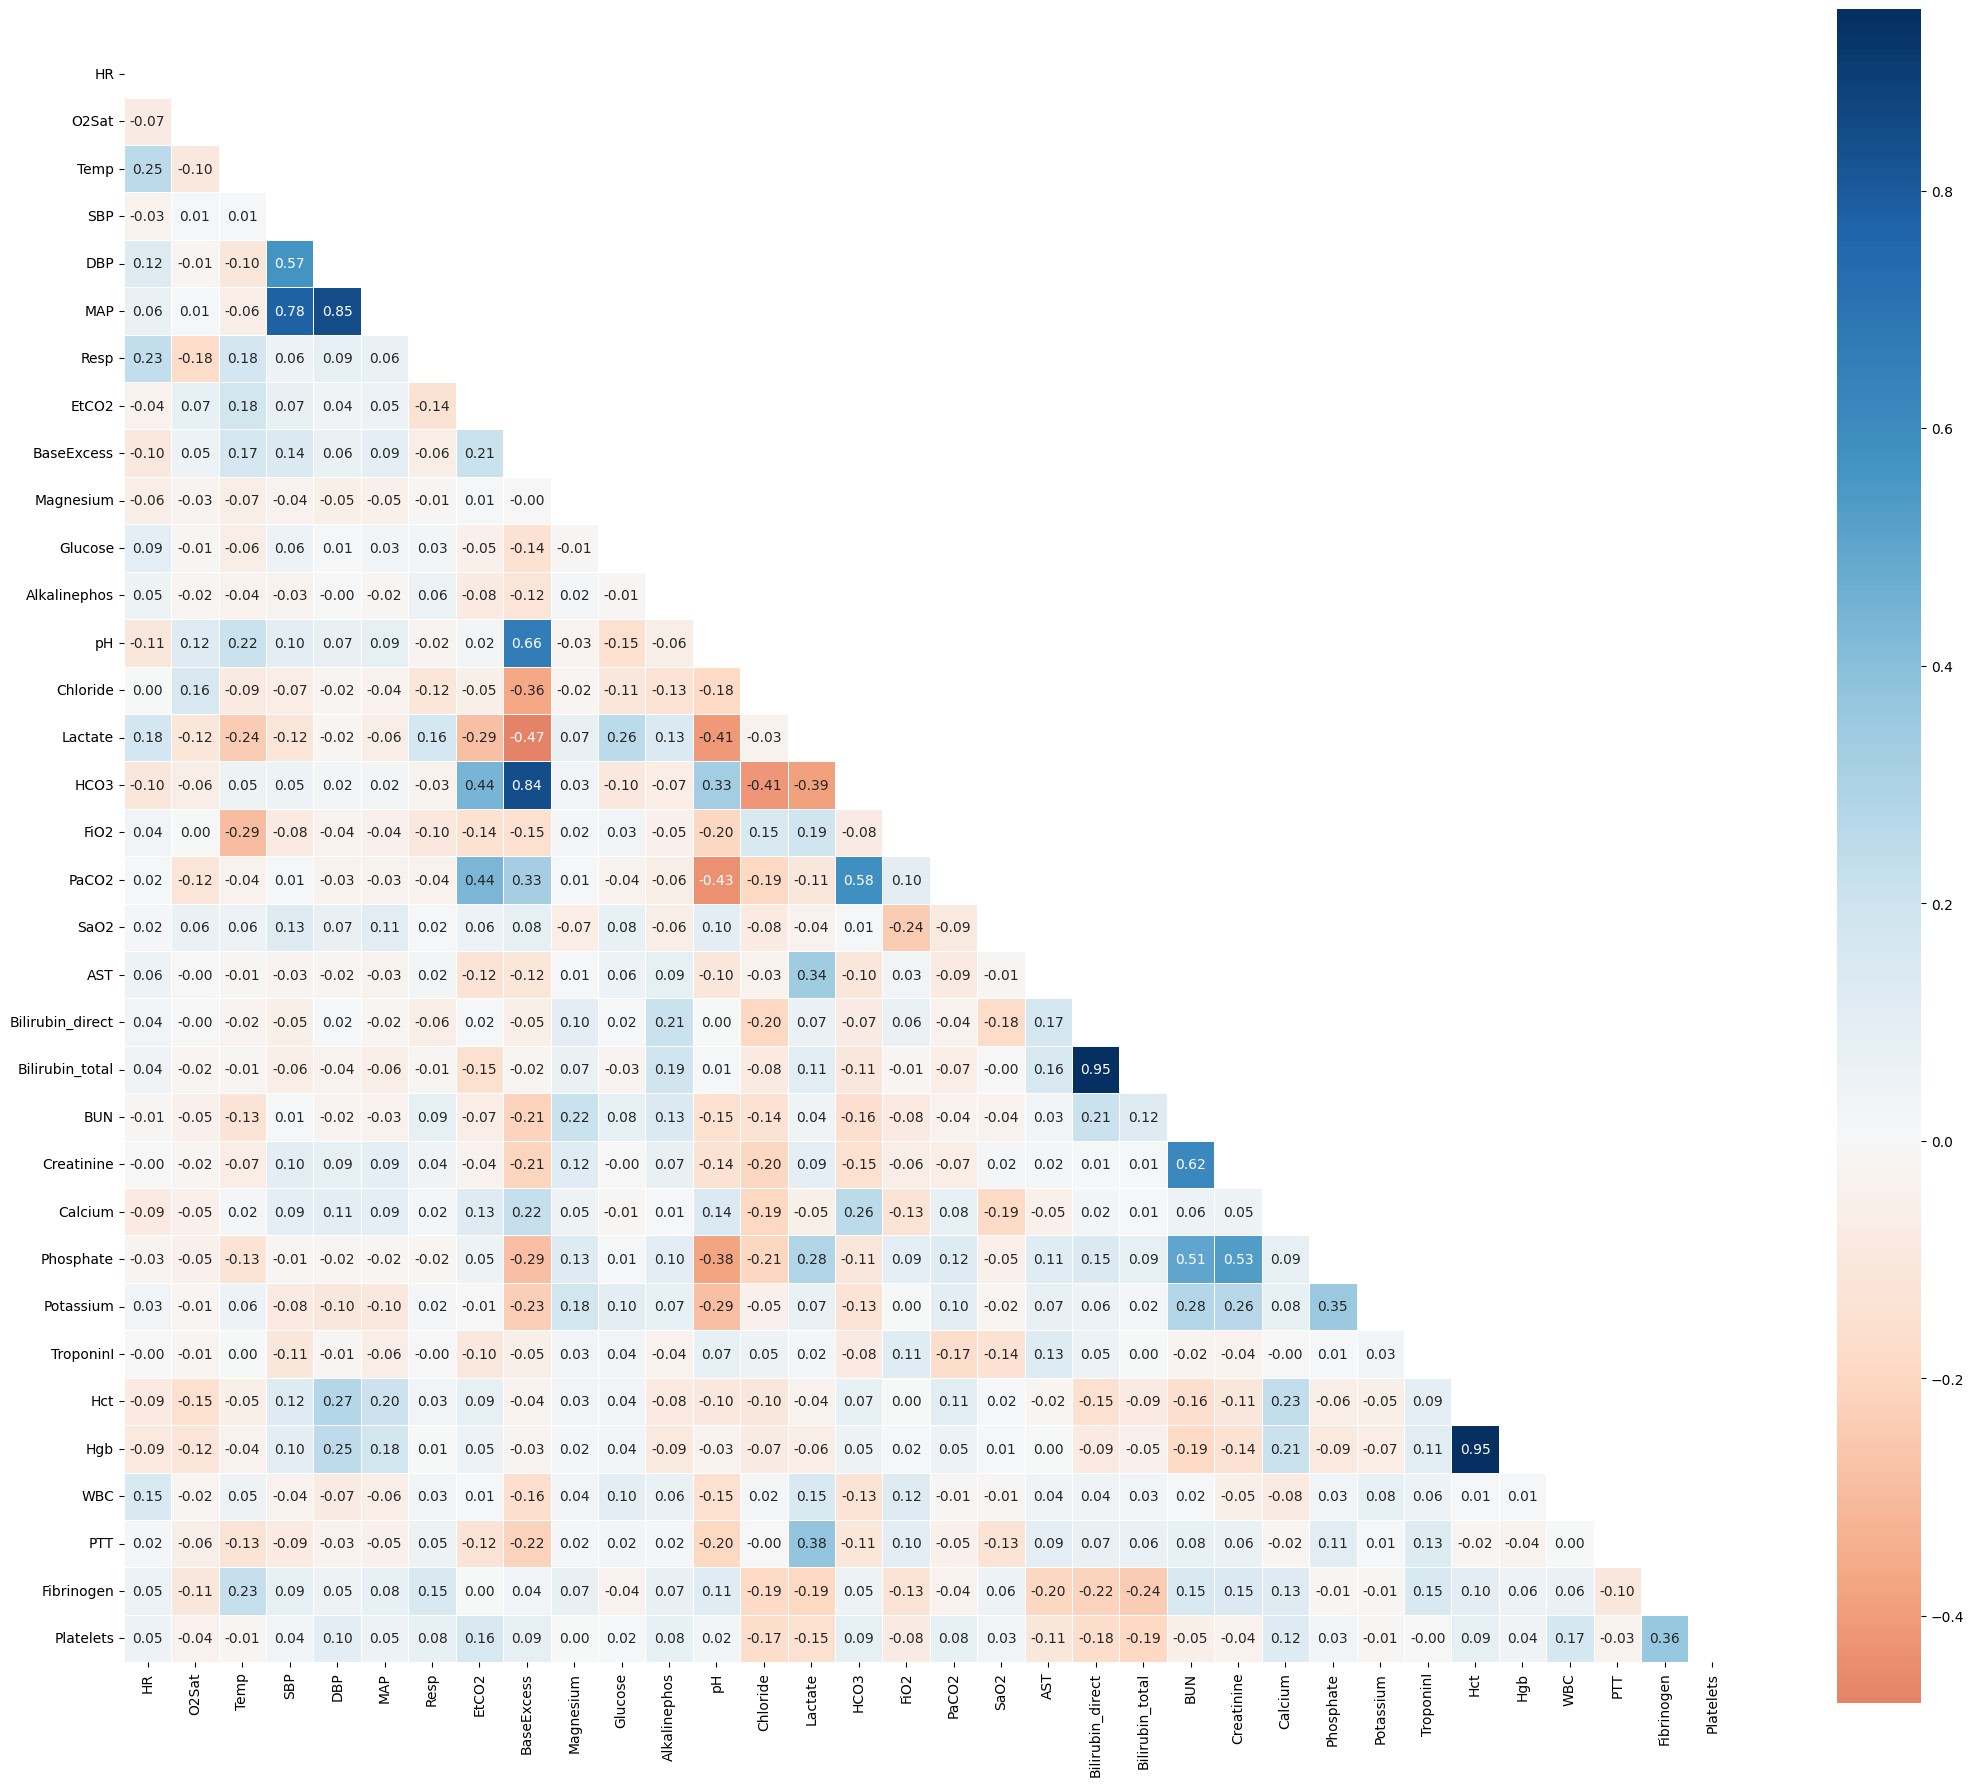

In [ ]:
corr_features = [
               # vitals
               "HR", # Heart Rate normal adult 60 - 100 beats per minute (bpm)
               "O2Sat", # Oxygen saturation normal adult 97% - 100% (%)
               "Temp", # Temperature normal 97.8°F/36.5°C - 99°F/37.2°C (°C)
               "SBP", # Systolic Blood Pressure normal < 120 mmHg (mm Hg)
               "DBP", # beclomethasone dipropionate normal < 80 mmHg (mm Hg)
               "MAP", # Mean Arterial Pressure (mm Hg)
               "Resp", # Respiration rate  12<normal<20 breaths / minute (bpm)
               "EtCO2", # End-tidal CO2 maximum concentration of CO2 at exhalation normal 35 - 45 mmHg (mm Hg) = REMOVED missing too much data
                # labs
              'BaseExcess', # strong acid to restore pH (mmoI/L)
              'Magnesium', # symptoms such as weakness, irritability, cardiac arrhythmia, nausea, and/or diarrhea (mmoI/L)
              'Glucose', # blood sugar test (indicates diagnose diabetes, pre-diabetes and gestational diabetes) (mg/dL)
              'Alkalinephos', # Alkaline phosphatase (indicates enzyme activity) (IU/L)
              'pH', # 0:14 = acidic = lower pH; alkaline = higher
              'Chloride', # an electrolyte to balance fluid in cells normal 96-103 ml (indicates blood pressure/pH) (mmoI/L)
              'Lactate', # high levels indicate lack of oxygen (hypoxia) or other conditions (indicates sepsis) (mg/dL)
              # Respiratory
              'HCO3', # Bicarbonate, carbon dioxide in blood (indicates metabolism / resp) (mmoI/L)
              'FiO2', # % of concentration of oxygen inhaled (indicates resp) (%) - REMOVED missing too much data
              'PaCO2', # partial pressure of carbon dioxide measured in blood (indicates resp) (mm Hg)
              'SaO2', # normal 95-100% oxygen saturation bound to hemoglobin (indicates resp) (%) = REMOVED no correlation
              # liver
              'AST', # aspartate aminotransferase (indicates liver) (IU/L)
              'Bilirubin_direct', # conjugated water soluble (indicates liver) (mg/dL) = REMOVED missing too much data
              'Bilirubin_total', # normal 0.1:1.2 mg/dL (indicates liver) (mg/dL)
              # kidneys
              'BUN', # blood urea nitrogen, nitrogen in the blood (indicates kidneys) (mg/dL)
              'Creatinine', # metabolic panel (indicates kidneys) (mg/dL)
              'Calcium', # indicates range of conditions bones, heart, nerves, kidneys, and teeth (mg/dL)
              'Phosphate', # related to calcium (indicates kidney or diabetes)  (mg/dL)
              'Potassium', # electrolyte or metabolism (affected by blood pressure, kidneys, etc.)  (mmoI/L)
              # Heart
              'TroponinI', # cardiac specific Trenonin I and T (indicates injury to heart muscle) = REMOVED missing too much data
              # Blood
              'Hct', # Hematocrit (indicates portion of blood from Red Blood Cell count) (%)
              'Hgb', # Hemoglobin apart of Complete Blood Count (CBC) (indicates blood cell count) (g/dL)
              'WBC', # White Blood Cell Count (indicates infection, inflammation or disease) (count10^3/µL)
              'PTT', # Partial Thromboplastin Time (indicates bleeding or blood clot) (seconds)
              'Fibrinogen', # coagulation factor I (indicates bleeding or blood clot or cardiovascular disease) (mg/dL) = REMOVED missing too much data
              'Platelets', # indicates bleeding disorder, a bone marrow disease, or other underlying condition ((count10^3/µL))
              # Demographics
              #'Age', # Years (100 for patients 90 or above)
              #'Gender', # Female = 0, Male = 1
              #'HospAdmTime', # Hours between hospital admit and ICU admit = REMOVED no corrleation
              #'ICULOS' # ICU length of stay in hours (hours since ICU admit)
            ]
corr_matrix = data[corr_features].corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [ ]:
corr_matrix = data.corr()
corr_matrix["isSepsis"].sort_values(ascending=False)

,isSepsis
isSepsis,1.000000
ICULOS,0.498937
Temp,0.163775
Bilirubin_direct,0.156336
Bilirubin_total,0.137293
Resp,0.134565
HR,0.128211
BUN,0.091530
WBC,0.063830
AST,0.058709


In [ ]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is a DataFrame
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["isSepsis"]),  # Features
    data["isSepsis"],                # Target
    test_size=0.20,                  # 20% for testing
    random_state=42                  # For reproducibility
)


In [9]:
imputer = SimpleImputer(strategy="median")

# fit applies the imputer to ALL numeric data in case new data includes null values
# when system goes live
# results are stored in a imputer.statistics_ value
imputer.fit_transform(X_train)

array([[ 8.2000e+01,  9.9000e+01,  3.7300e+01, ...,  1.0000e+00,
        -2.5460e+01,  1.4000e+01],
       [ 9.2000e+01,  1.0000e+02,  3.6000e+01, ...,  0.0000e+00,
        -2.6404e+02,  3.6000e+01],
       [ 7.6000e+01,  9.8000e+01,  3.5700e+01, ...,  1.0000e+00,
        -2.2300e+00,  3.5000e+01],
       ...,
       [ 8.0000e+01,  9.6000e+01,  3.6800e+01, ...,  0.0000e+00,
        -2.0000e-02,  2.1000e+01],
       [ 9.6000e+01,  9.6000e+01,  3.6670e+01, ...,  1.0000e+00,
        -2.0000e-02,  3.1000e+01],
       [ 9.5000e+01,  9.6000e+01,  3.6800e+01, ...,  1.0000e+00,
        -2.0000e-02,  2.0000e+01]])

In [10]:
# apply the trained imputer to transform the training set replacing the
# missing values with learn medians
N = imputer.transform(X_train)
# result above is plain NumPy array with transformed features
# put back to a pandas DataFrame
M = pd.DataFrame(N, columns=X_train.columns, index=X_train.index)
M.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
31441,82.0,99.0,37.3,107.0,69.0,52.0,18.0,33.0,0.0,24.0,...,30.7,15.5,252.0,231.0,59.0,1.0,0.0,1.0,-25.46,14.0
34518,92.0,100.0,36.0,121.0,68.0,50.0,18.0,33.0,0.0,24.0,...,30.7,10.0,252.0,193.0,62.0,1.0,1.0,0.0,-264.04,36.0
26088,76.0,98.0,35.7,132.5,70.0,49.0,18.0,33.0,0.0,24.0,...,30.8,14.9,379.0,346.0,88.0,0.0,0.0,1.0,-2.23,35.0
19435,66.0,100.0,35.2,134.0,91.0,69.0,14.0,33.0,0.0,24.0,...,34.7,6.8,252.0,186.0,80.0,1.0,0.0,1.0,-58.09,7.0
24447,70.0,100.0,36.8,139.0,104.0,82.0,18.0,33.0,0.0,24.0,...,30.7,3.9,252.0,167.0,49.0,1.0,1.0,0.0,-0.04,6.0


In [11]:
scaler = StandardScaler()

O = scaler.fit_transform(N)
P = pd.DataFrame(O, columns=X_train.columns, index=X_train.index)
P.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
31441,-0.084814,0.552287,0.837954,-0.690648,-0.798812,-0.920082,-0.003464,0.011526,0.035551,-0.037435,...,-0.172613,0.692824,-0.064104,0.256870,-0.164552,0.887394,-0.660547,0.660547,0.188924,-0.127896
34518,0.492701,0.912325,-1.379069,-0.069089,-0.859199,-1.080930,-0.003464,0.011526,0.035551,-0.037435,...,-0.172613,-0.145902,-0.064104,-0.142108,0.017712,0.887394,1.513897,-1.513897,-1.550322,0.851386
26088,-0.431322,0.192249,-1.890690,0.441477,-0.738425,-1.161355,-0.003464,0.011526,0.035551,-0.037435,...,-0.165484,0.601326,3.204265,1.464303,1.597337,-1.126895,-0.660547,0.660547,0.358271,0.806873
19435,-1.008837,0.912325,-2.743391,0.508072,0.529710,0.447126,-0.830579,0.011526,0.035551,-0.037435,...,0.112585,-0.633887,-0.064104,-0.215604,1.111299,0.887394,-0.660547,0.660547,-0.048948,-0.439486
24447,-0.777831,0.912325,-0.014747,0.730057,1.314746,1.492639,-0.003464,0.011526,0.035551,-0.037435,...,-0.172613,-1.076124,-0.064104,-0.415093,-0.772100,0.887394,1.513897,-1.513897,0.374236,-0.483999


In [ ]:
data.to_csv("data.csv")

In [13]:
# this pipeline should work for all the estimators/algorithms
pipeline = Pipeline([
                    ('imputer', SimpleImputer(strategy='median')),
                    ('std_scaler', StandardScaler()),
                    ])

In [14]:
X_train_prepared = pipeline.fit_transform(X_train)

In [15]:
X_test_prepared = pipeline.fit_transform(X_test)

In [16]:
# select the estimator
CLF = RandomForestClassifier()

In [17]:
# fit the model to the data
CLF.fit(X_train_prepared, y_train)

RandomForestClassifier()

In [18]:
# cross validate the models performance
cv_rfc = cross_validate(CLF,
                       X_train_prepared,
                       y_train,
                       n_jobs=-1,
                       cv=3,
                       scoring="f1",
                       return_train_score=True)
cv_rfc

{'fit_time': array([8.67353463, 8.88482666, 7.55723691]),
 'score_time': array([0.1657443 , 0.17081428, 0.12332058]),
 'test_score': array([0.77842324, 0.75585284, 0.7555938 ]),
 'train_score': array([1., 1., 1.])}

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'data' is a DataFrame
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["isSepsis"]),  # Features
    data["isSepsis"],                # Target
    test_size=0.20,                  # 20% for testing
    random_state=42                  # For reproducibility
)

# Ensure 'CLF' is your trained classifier and 'X_train_prepared' is preprocessed data for training
cm = confusion_matrix(y_train, CLF.predict(X_train_prepared))  # Compute confusion matrix

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLF.classes_)

# Plot the confusion matrix
title = "RF Confusion Matrix"
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="binary", ax=ax)
ax.set_title(title)  # Add title to the plot

print(title)
print(cm)  # Print the confusion matrix as a numerical array

# Save the figure (optional)
# plt.savefig("../reports/figures/experiment/rf_cm.png", dpi=400)

plt.show()

SyntaxError: invalid syntax (<ipython-input-20-142a5f1e493c>, line 2)

In [ ]:
# Predictions on the training set
train_predictions = CLF.predict(X_train_prepared)

# Predictions on the test set
test_predictions = CLF.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average="weighted")
train_recall = recall_score(y_train, train_predictions, average="weighted")
train_f1 = f1_score(y_train, train_predictions, average="weighted")

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average="weighted")
test_recall = recall_score(y_test, test_predictions, average="weighted")
test_f1 = f1_score(y_test, test_predictions, average="weighted")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Test Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [21]:
import joblib

# Save the model to a file
joblib.dump(CLF, 'model40F.pkl')


['model40F.pkl']